###Initial things

In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import svm
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:ylabel='Class'>

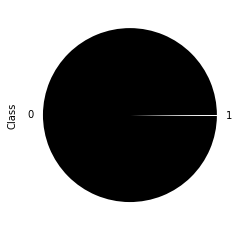

In [3]:
# showing that this dataset is totally unbalanced
count_classes = pd.value_counts(dataset['Class'])
count_classes.plot.pie(colors = ['black', 'white'])

In [4]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

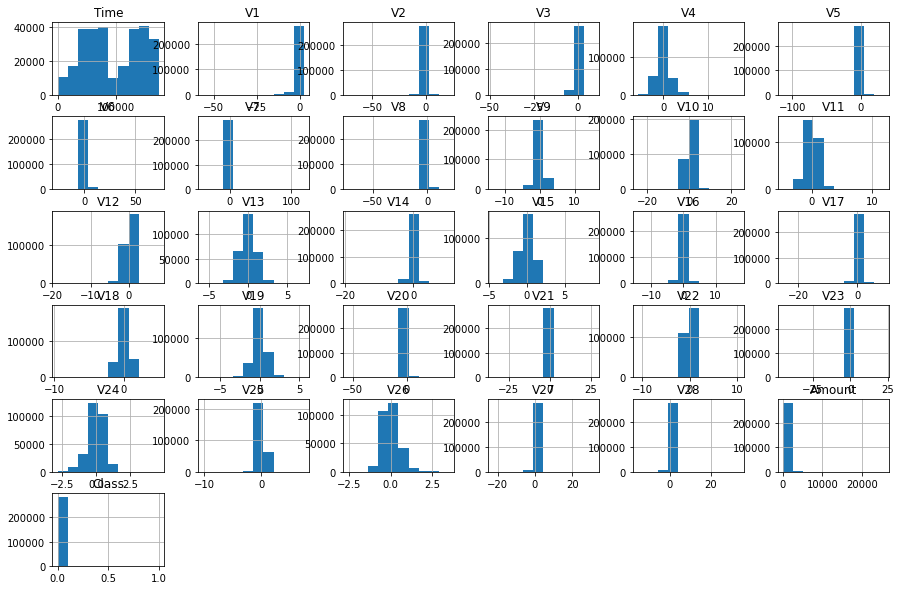

In [6]:
dataset.hist(figsize=(15, 10));

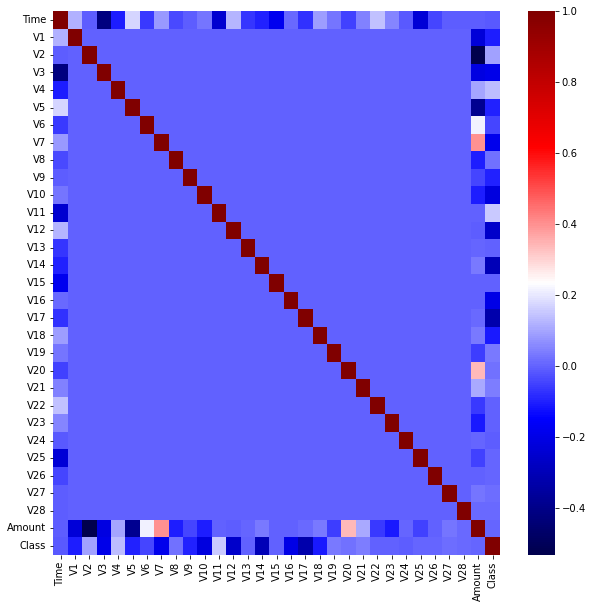

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show();

In [8]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print("Fraud ", fraud.shape)

Fraud  (492, 31)


In [9]:
scores = []

In [10]:
#  "Support Vector Machine",
#names = ["Logistic Regression", "Random Forest", "XGBoost", "Ada Boost", "Stochastic Gradient Descent", "Neural Network Models (supervised)", 
#         "Decision Trees", "Gaussian Naive Bayes", "Gradient Boosting", "K-Nearest Neighbors", "Voting Classifier"]

names = ["XGBoost", "DT", "SGD", "VC"]


In [11]:
preci = []
recall = []
f1 = []

###Extreme Gradient Boosting (XGBoost)

In [12]:
X = np.asarray(dataset.drop('Class', axis=1))
y = np.asarray(dataset['Class'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=30)
X_train.shape

(227845, 30)

In [14]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [15]:
xgb_clf = XGBClassifier(n_estimators=300, use_label_encoder=False)
#import time
#start_time = time.clock()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')
#print(time.clock() - start_time, "seconds")


y_test_pred = xgb_clf.predict(X_test)

In [16]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9995084442259752


In [17]:
print(confusion_matrix(y_test, y_test_pred))

[[56860     4]
 [   24    74]]


In [18]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

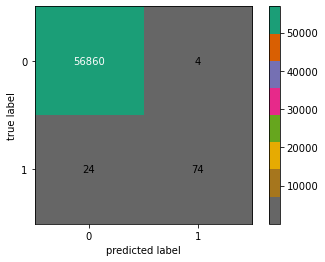

In [19]:
xgb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=xgb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [20]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_split= 3, min_samples_leaf = 1, random_state=30)
#import time
#start_time = time.clock()
dt_clf = dt_clf.fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")

In [24]:
y_test_pred = dt_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9992099996488887


In [25]:
print(confusion_matrix(y_test, y_test_pred))

[[56847    17]
 [   28    70]]


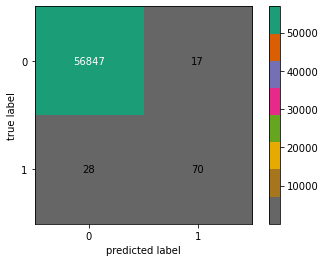

In [26]:
dt_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=dt_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [27]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.71      0.76        98

    accuracy                           1.00     56962
   macro avg       0.90      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [28]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Stochastic gradient descent

In [29]:
from sklearn.linear_model import SGDClassifier

In [30]:
import time
#start_time = time.clock()
sgd_clf = SGDClassifier(loss="log", penalty="l2", max_iter=3000000).fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")

In [31]:
y_test_pred = sgd_clf.predict(X_test)

In [32]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9989642217618764


In [33]:
print(confusion_matrix(y_test, y_test_pred))

[[56854    10]
 [   49    49]]


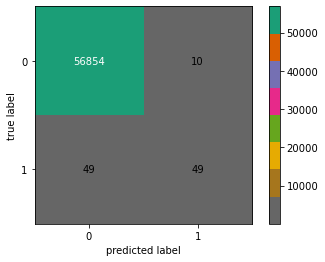

In [34]:
sgd_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=sgd_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [35]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.50      0.62        98

    accuracy                           1.00     56962
   macro avg       0.91      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [36]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Voting Classifier

In [37]:
from sklearn.ensemble import VotingClassifier

labels = ["XGBoost", "Decision Tree", "Stochastic Gradient Descent"]
from sklearn.ensemble import VotingClassifier

In [38]:
voting_clf = VotingClassifier (estimators = [('XGBoost', xgb_clf), ('DT', dt_clf), ('SGD', sgd_clf)],
voting='soft')
#import time
#start_time = time.clock()
voting_clf.fit(X_train,y_train)
#print(time.clock() - start_time, "seconds")

y_test_pred = voting_clf.predict(X_test)

[18:13:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9992977774656788


In [40]:
print(confusion_matrix(y_test, y_test_pred))

[[56853    11]
 [   29    69]]


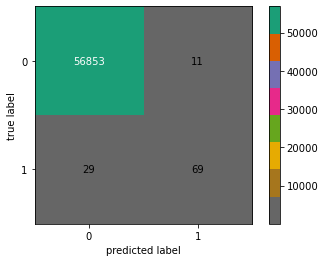

In [41]:
voting_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=voting_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [42]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.70      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

In [44]:
scores = [round(x*100, 2)  for x in scores]
preci = [round(x*100, 2)  for x in preci]
recall = [round(x*100, 2)  for x in recall]
f1 = [round(x*100, 2)  for x in f1]

In [45]:
df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores
cm = sns.light_palette("purple", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Classifier Name,Accuracy Score
0,XGBoost,99.950000
1,DT,99.920000
2,SGD,99.900000
3,VC,99.930000


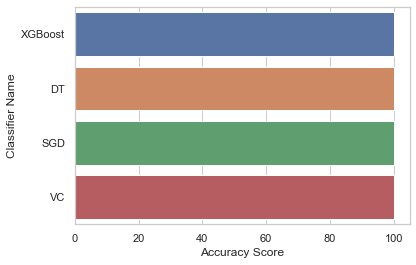

In [46]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data = df)

In [47]:
import pandas as pd
from zipfile import ZipFile as zip
res_df = pd.DataFrame(np.column_stack([names, scores, preci, recall, f1]), columns =['Classifier', 'Accuracy Score', 'Precision', 'Recall', 'F1-score'])

In [48]:
res_df

,Classifier,Accuracy Score,Precision,Recall,F1-score
0,XGBoost,99.95,97.41,87.75,92.03
1,DT,99.92,90.21,85.7,87.82
2,SGD,99.9,91.48,74.99,81.18
3,VC,99.93,93.1,85.19,88.75


In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.pyplot import figure

In [50]:
voting_probs = voting_clf.predict_proba(X_test)
voting_probs = voting_probs[:, 1]
voting_auc = roc_auc_score(y_test, voting_probs)
voting_auc

0.9779631745776534